# Task 1: Load the League of Legends dataset and preprocess it for training

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim

In [19]:
df = pd.read_csv("games.csv")
df

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,5,0,0,1,1,114,67,43,16,51
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,2,0,0,0,0,11,67,238,51,420
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,2,0,0,1,0,157,238,121,57,28
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,0,0,0,0,0,164,18,141,40,51
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,3,0,0,1,0,86,11,201,122,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51485,3308904636,1503076540231,1944,9,2,1,2,2,0,2,...,10,2,0,4,0,55,-1,90,238,157
51486,3215685759,1496957179355,3304,9,2,1,1,2,2,2,...,11,7,4,4,1,157,55,119,154,105
51487,3322765040,1504029863961,2156,9,2,2,2,2,0,1,...,10,2,0,2,0,113,122,53,11,157
51488,3256675373,1499562036246,1475,9,2,2,2,2,0,2,...,11,3,0,1,0,154,39,51,90,114


In [20]:
df.head()

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,5,0,0,1,1,114,67,43,16,51
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,2,0,0,0,0,11,67,238,51,420
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,2,0,0,1,0,157,238,121,57,28
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,0,0,0,0,0,164,18,141,40,51
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,3,0,0,1,0,86,11,201,122,18


In [21]:
df.tail()

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
51485,3308904636,1503076540231,1944,9,2,1,2,2,0,2,...,10,2,0,4,0,55,-1,90,238,157
51486,3215685759,1496957179355,3304,9,2,1,1,2,2,2,...,11,7,4,4,1,157,55,119,154,105
51487,3322765040,1504029863961,2156,9,2,2,2,2,0,1,...,10,2,0,2,0,113,122,53,11,157
51488,3256675373,1499562036246,1475,9,2,2,2,2,0,2,...,11,3,0,1,0,154,39,51,90,114
51489,3317333020,1503612754059,1445,9,1,1,1,1,1,2,...,1,0,0,1,0,11,157,141,31,18


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51490 entries, 0 to 51489
Data columns (total 61 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   gameId              51490 non-null  int64
 1   creationTime        51490 non-null  int64
 2   gameDuration        51490 non-null  int64
 3   seasonId            51490 non-null  int64
 4   winner              51490 non-null  int64
 5   firstBlood          51490 non-null  int64
 6   firstTower          51490 non-null  int64
 7   firstInhibitor      51490 non-null  int64
 8   firstBaron          51490 non-null  int64
 9   firstDragon         51490 non-null  int64
 10  firstRiftHerald     51490 non-null  int64
 11  t1_champ1id         51490 non-null  int64
 12  t1_champ1_sum1      51490 non-null  int64
 13  t1_champ1_sum2      51490 non-null  int64
 14  t1_champ2id         51490 non-null  int64
 15  t1_champ2_sum1      51490 non-null  int64
 16  t1_champ2_sum2      51490 non-null  int6

In [23]:
df.describe()

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
count,5.149000e+04,5.149000e+04,51490.000000,51490.0,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,...,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000
mean,3.306223e+09,1.502926e+12,1832.362808,9.0,1.493552,1.471295,1.450631,1.308487,0.926510,1.442804,...,5.549466,0.985084,0.414547,1.404370,0.240105,108.216294,107.910216,108.690581,108.626044,108.066576
std,2.946096e+07,1.978026e+09,512.017696,0.0,0.499963,0.520326,0.542848,0.676097,0.841424,0.569579,...,3.860989,1.256284,0.613768,1.224492,0.427151,102.551787,102.870710,102.592145,103.346952,102.756149
min,3.214824e+09,1.496892e+12,190.000000,9.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,3.292218e+09,1.502021e+12,1531.000000,9.0,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,38.000000,37.000000,38.000000,38.000000,38.000000
50%,3.320021e+09,1.503844e+12,1833.000000,9.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,6.000000,0.000000,0.000000,1.000000,0.000000,90.000000,90.000000,90.000000,90.000000,90.000000
75%,3.327099e+09,1.504352e+12,2148.000000,9.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,9.000000,2.000000,1.000000,2.000000,0.000000,141.000000,141.000000,141.000000,141.000000,141.000000
max,3.331833e+09,1.504707e+12,4728.000000,9.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,11.000000,10.000000,4.000000,6.000000,1.000000,516.000000,516.000000,516.000000,516.000000,516.000000


In [24]:
df.isnull().sum()

gameId          0
creationTime    0
gameDuration    0
seasonId        0
winner          0
               ..
t2_ban1         0
t2_ban2         0
t2_ban3         0
t2_ban4         0
t2_ban5         0
Length: 61, dtype: int64

In [25]:
# Drop non-numeric or irrelevant columns (e.g., gameid, date, etc.)
data = df.select_dtypes(include=[np.number])
data

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,5,0,0,1,1,114,67,43,16,51
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,2,0,0,0,0,11,67,238,51,420
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,2,0,0,1,0,157,238,121,57,28
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,0,0,0,0,0,164,18,141,40,51
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,3,0,0,1,0,86,11,201,122,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51485,3308904636,1503076540231,1944,9,2,1,2,2,0,2,...,10,2,0,4,0,55,-1,90,238,157
51486,3215685759,1496957179355,3304,9,2,1,1,2,2,2,...,11,7,4,4,1,157,55,119,154,105
51487,3322765040,1504029863961,2156,9,2,2,2,2,0,1,...,10,2,0,2,0,113,122,53,11,157
51488,3256675373,1499562036246,1475,9,2,2,2,2,0,2,...,11,3,0,1,0,154,39,51,90,114


In [35]:
# Convert winner values: 1 -> 0, 2 -> 1
data['winner'] = data['winner'].replace({1: 0, 2: 1})

In [37]:
# Target column is 'winner'
y = data['winner'].values
X = data.drop(columns=['winner']).values

In [38]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
# Convert to tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.reshape(-1, 1), dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.reshape(-1, 1), dtype=torch.float32)

# Task 2: Implement logistic regression using PyTorch

In [41]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        return self.sigmoid(self.linear(x))

input_dim = X_train.shape[1]
model = LogisticRegressionModel(input_dim)
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Task 3: Train the model

In [45]:
epochs = 100
for epoch in range(epochs):
    model.train()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.2f}")

Epoch 1/100, Loss: 0.56
Epoch 2/100, Loss: 0.55
Epoch 3/100, Loss: 0.54
Epoch 4/100, Loss: 0.54
Epoch 5/100, Loss: 0.53
Epoch 6/100, Loss: 0.53
Epoch 7/100, Loss: 0.52
Epoch 8/100, Loss: 0.52
Epoch 9/100, Loss: 0.51
Epoch 10/100, Loss: 0.51
Epoch 11/100, Loss: 0.51
Epoch 12/100, Loss: 0.50
Epoch 13/100, Loss: 0.50
Epoch 14/100, Loss: 0.49
Epoch 15/100, Loss: 0.49
Epoch 16/100, Loss: 0.48
Epoch 17/100, Loss: 0.48
Epoch 18/100, Loss: 0.48
Epoch 19/100, Loss: 0.47
Epoch 20/100, Loss: 0.47
Epoch 21/100, Loss: 0.47
Epoch 22/100, Loss: 0.46
Epoch 23/100, Loss: 0.46
Epoch 24/100, Loss: 0.45
Epoch 25/100, Loss: 0.45
Epoch 26/100, Loss: 0.45
Epoch 27/100, Loss: 0.44
Epoch 28/100, Loss: 0.44
Epoch 29/100, Loss: 0.44
Epoch 30/100, Loss: 0.44
Epoch 31/100, Loss: 0.43
Epoch 32/100, Loss: 0.43
Epoch 33/100, Loss: 0.43
Epoch 34/100, Loss: 0.42
Epoch 35/100, Loss: 0.42
Epoch 36/100, Loss: 0.42
Epoch 37/100, Loss: 0.42
Epoch 38/100, Loss: 0.41
Epoch 39/100, Loss: 0.41
Epoch 40/100, Loss: 0.41
Epoch 41/

In [46]:
# Accuracy function
def accuracy(preds, labels):
    preds_class = preds >= 0.5
    return (preds_class == labels).sum().item() / len(labels)

model.eval()
train_preds = model(X_train_tensor)
test_preds = model(X_test_tensor)

print("Train Accuracy:", accuracy(train_preds, y_train_tensor))
print("Test Accuracy:", accuracy(test_preds, y_test_tensor))

Train Accuracy: 0.9219508642454846
Test Accuracy: 0.92212080015537


# Task 4: Add L2 Regularization (weight decay)

In [47]:
model_l2 = LogisticRegressionModel(input_dim)
optimizer_l2 = optim.SGD(model_l2.parameters(), lr=0.01, weight_decay=0.01)

In [ ]:
for epoch in range(epochs):
    model_l2.train()
    outputs = model_l2(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    optimizer_l2.zero_grad()
    loss.backward()
    optimizer_l2.step()

model_l2.eval()
train_preds_l2 = model_l2(X_train_tensor)
test_preds_l2 = model_l2(X_test_tensor)

In [49]:
print("Train Accuracy (L2):", accuracy(train_preds_l2, y_train_tensor))
print("Test Accuracy (L2):", accuracy(test_preds_l2, y_test_tensor))

Train Accuracy (L2): 0.9027723829869878
Test Accuracy (L2): 0.9008545348611381


# Task 5: Visualize performance

In [52]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns

In [53]:
pred_labels = (test_preds >= 0.5).int().numpy()
true_labels = y_test_tensor.int().numpy()

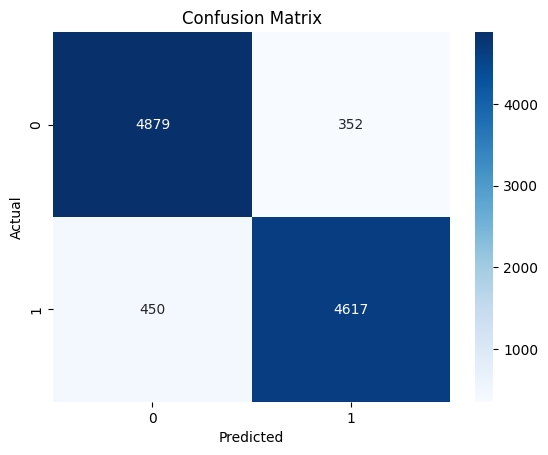

In [54]:
# Confusion matrix
cm = confusion_matrix(true_labels, pred_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [55]:
# Classification report
print(classification_report(true_labels, pred_labels))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92      5231
           1       0.93      0.91      0.92      5067

    accuracy                           0.92     10298
   macro avg       0.92      0.92      0.92     10298
weighted avg       0.92      0.92      0.92     10298



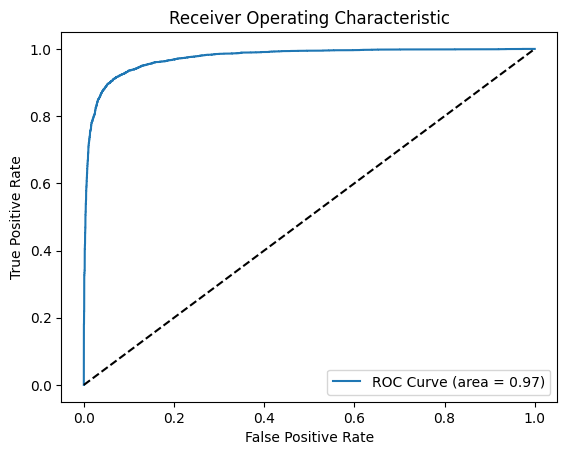

In [56]:
# ROC curve
fpr, tpr, _ = roc_curve(true_labels, test_preds.detach().numpy())
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

# Task 6: Save and load model

In [57]:
# Save model
torch.save(model.state_dict(), 'logistic_model.pth')

In [58]:
# Load model
loaded_model = LogisticRegressionModel(input_dim)
loaded_model.load_state_dict(torch.load('logistic_model.pth'))
loaded_model.eval()

LogisticRegressionModel(
  (linear): Linear(in_features=60, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [59]:
loaded_preds = loaded_model(X_test_tensor)
print("Loaded Model Accuracy:", accuracy(loaded_preds, y_test_tensor))

Loaded Model Accuracy: 0.92212080015537


# Task 7: Hyperparameter tuning

In [60]:
learning_rates = [0.001, 0.01, 0.05, 0.1]
best_acc = 0
best_lr = 0

In [61]:
for lr in learning_rates:
    model_tune = LogisticRegressionModel(input_dim)
    optimizer_tune = optim.SGD(model_tune.parameters(), lr=lr)
    for epoch in range(50):
        model_tune.train()
        outputs = model_tune(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)

        optimizer_tune.zero_grad()
        loss.backward()
        optimizer_tune.step()

    model_tune.eval()
    preds = model_tune(X_test_tensor)
    acc = accuracy(preds, y_test_tensor)
    print(f"Learning Rate: {lr}, Test Accuracy: {acc:.2f}")
    if acc > best_acc:
        best_acc = acc
        best_lr = lr

print(f"Best Learning Rate: {best_lr}, Accuracy: {best_acc:.2f}")

Learning Rate: 0.001, Test Accuracy: 0.55
Learning Rate: 0.01, Test Accuracy: 0.87
Learning Rate: 0.05, Test Accuracy: 0.93
Learning Rate: 0.1, Test Accuracy: 0.94
Best Learning Rate: 0.1, Accuracy: 0.94


# Task 8: Feature importance

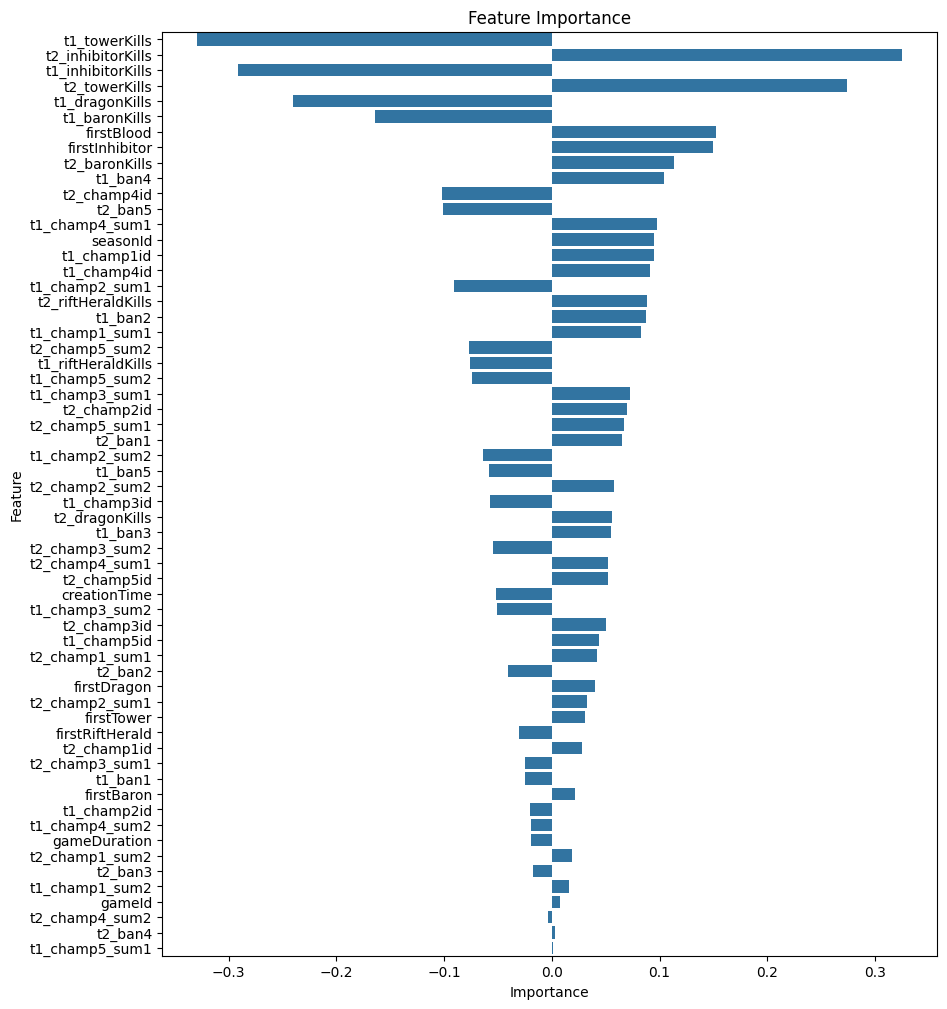

In [66]:
feature_weights = model.linear.weight.detach().numpy().flatten()
feature_names = data.drop(columns=['winner']).columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_weights})
importance_df = importance_df.reindex(importance_df.Importance.abs().sort_values(ascending=False).index)

# Plot
plt.figure(figsize=(10, 12))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()